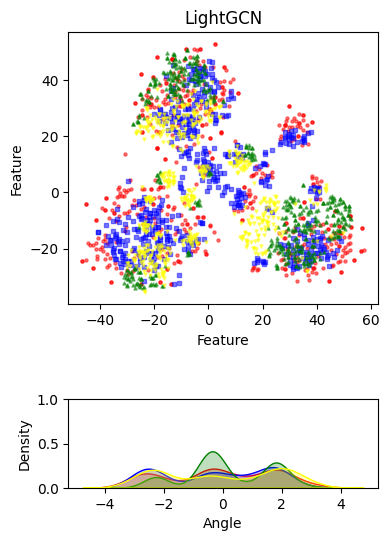

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

# Load data
train_data = pd.read_csv('./ThinGCN/dataset/yelp2018/train.txt', delim_whitespace=True, header=None, names=['user_id', 'item_id', 'interaction'])
test_data = pd.read_csv('./ThinGCN/dataset/yelp2018/test.txt', delim_whitespace=True, header=None, names=['user_id', 'item_id', 'interaction'])
user_emb = torch.load('./ThinGCN/embedding/base/LightGCN/best_user_emb.pt', map_location=torch.device('cpu'))
item_emb = torch.load('./ThinGCN/embedding/base/LightGCN/best_item_emb.pt', map_location=torch.device('cpu'))


# Calculate popularity
combined_data = pd.concat([train_data, test_data])
user_popularity = combined_data.groupby('user_id')['interaction'].sum().reset_index()
item_popularity = combined_data.groupby('item_id')['interaction'].sum().reset_index()

# Define thresholds for hot and cold sampling
user_hot_threshold = user_popularity['interaction'].quantile(0.95)
user_cold_threshold = user_popularity['interaction'].quantile(0.80)
item_hot_threshold = item_popularity['interaction'].quantile(0.95)
item_cold_threshold = item_popularity['interaction'].quantile(0.80)

# Sample hot and cold users/items
hot_users = user_popularity[user_popularity['interaction'] > user_hot_threshold].sample(500, replace=True)
cold_users = user_popularity[user_popularity['interaction'] <= user_cold_threshold].sample(500, replace=True)
hot_items = item_popularity[item_popularity['interaction'] > item_hot_threshold].sample(500, replace=True)
cold_items = item_popularity[item_popularity['interaction'] <= item_cold_threshold].sample(500, replace=True)

# Extract embeddings for sampled hot and cold users and items
hot_user_emb = user_emb[hot_users['user_id'].values]
cold_user_emb = user_emb[cold_users['user_id'].values]
hot_item_emb = item_emb[hot_items['item_id'].values]
cold_item_emb = item_emb[cold_items['item_id'].values]

# Combine and map to 2D using t-SNE
combined_user_emb = torch.cat([hot_user_emb, cold_user_emb])
combined_item_emb = torch.cat([hot_item_emb, cold_item_emb])
tsne = TSNE(n_components=2, random_state=42)
user_emb_2d = tsne.fit_transform(combined_user_emb)
item_emb_2d = tsne.fit_transform(combined_item_emb)

angles_hot_users = np.arctan2(user_emb_2d[:500, 1], user_emb_2d[:500, 0])
angles_cold_users = np.arctan2(user_emb_2d[500:, 1], user_emb_2d[500:, 0])
angles_hot_items = np.arctan2(item_emb_2d[:500, 1], item_emb_2d[:500, 0])
angles_cold_items = np.arctan2(item_emb_2d[500:, 1], item_emb_2d[500:, 0])

# Create a new figure for both the scatter and KDE plots
plt.figure(figsize=(4, 6))

plt.subplot(2, 1, 1)
plt.scatter(user_emb_2d[:500, 0], user_emb_2d[:500, 1], s=5, alpha=0.5, label='Hot Users', color='red', marker='o')
plt.scatter(user_emb_2d[500:, 0], user_emb_2d[500:, 1], s=5, alpha=0.5, label='Cold Users', color='blue', marker='s')
plt.scatter(item_emb_2d[:500, 0], item_emb_2d[:500, 1], s=5, alpha=0.5, label='Hot Items', color='green', marker='^')
plt.scatter(item_emb_2d[500:, 0], item_emb_2d[500:, 1], s=5, alpha=0.5, label='Cold Items', color='yellow', marker='v')

plt.title("LightGCN")
plt.xlabel("Feature")
plt.ylabel("Feature")
# plt.legend()

# Plot KDE for angles
plt.subplot(2, 1, 2, aspect=3)
sns.kdeplot(angles_hot_users, fill=True, color='red', label='Hot Users')  # dark gray
sns.kdeplot(angles_cold_users, fill=True, color='blue', label='Cold Users')  # medium-dark gray
sns.kdeplot(angles_hot_items, fill=True, color='green', label='Hot Items')  # medium-light gray
sns.kdeplot(angles_cold_items, fill=True, color='yellow', label='Cold Items')  # light gray

# Labeling the plot
# plt.title("KDE of atan2(y, x) for Each Group")
plt.xlabel("Angle")
plt.ylabel("Density")
# plt.xlim(-2, 2)
plt.ylim(0, 1)
# plt.legend()

plt.tight_layout()
plt.savefig('/Users/mean/Downloads/ThinGCN/embedding/base/LightGCN/LightGCN.png')
plt.show()



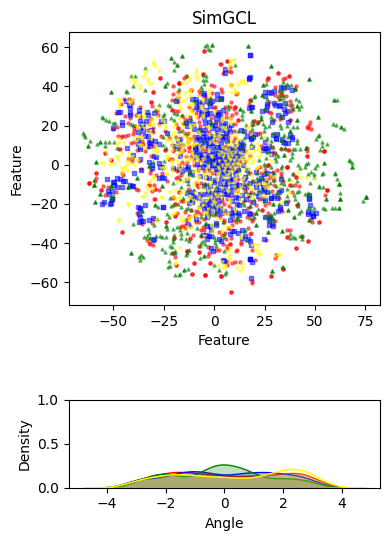

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

# Load data
train_data = pd.read_csv('./ThinGCN/dataset/yelp2018/train.txt', delim_whitespace=True, header=None, names=['user_id', 'item_id', 'interaction'])
test_data = pd.read_csv('./ThinGCN/dataset/yelp2018/test.txt', delim_whitespace=True, header=None, names=['user_id', 'item_id', 'interaction'])
user_emb = torch.load('./ThinGCN/embedding/base/SimGCL/best_user_emb.pt', map_location=torch.device('cpu'))
item_emb = torch.load('./ThinGCN/embedding/base/SimGCL/best_item_emb.pt', map_location=torch.device('cpu'))


# Calculate popularity
combined_data = pd.concat([train_data, test_data])
user_popularity = combined_data.groupby('user_id')['interaction'].sum().reset_index()
item_popularity = combined_data.groupby('item_id')['interaction'].sum().reset_index()

# Define thresholds for hot and cold sampling
user_hot_threshold = user_popularity['interaction'].quantile(0.95)
user_cold_threshold = user_popularity['interaction'].quantile(0.80)
item_hot_threshold = item_popularity['interaction'].quantile(0.95)
item_cold_threshold = item_popularity['interaction'].quantile(0.80)

# Sample hot and cold users/items
hot_users = user_popularity[user_popularity['interaction'] > user_hot_threshold].sample(500, replace=True)
cold_users = user_popularity[user_popularity['interaction'] <= user_cold_threshold].sample(500, replace=True)
hot_items = item_popularity[item_popularity['interaction'] > item_hot_threshold].sample(500, replace=True)
cold_items = item_popularity[item_popularity['interaction'] <= item_cold_threshold].sample(500, replace=True)

# Extract embeddings for sampled hot and cold users and items
hot_user_emb = user_emb[hot_users['user_id'].values]
cold_user_emb = user_emb[cold_users['user_id'].values]
hot_item_emb = item_emb[hot_items['item_id'].values]
cold_item_emb = item_emb[cold_items['item_id'].values]

# Combine and map to 2D using t-SNE
combined_user_emb = torch.cat([hot_user_emb, cold_user_emb])
combined_item_emb = torch.cat([hot_item_emb, cold_item_emb])
tsne = TSNE(n_components=2, random_state=42)
user_emb_2d = tsne.fit_transform(combined_user_emb)
item_emb_2d = tsne.fit_transform(combined_item_emb)

angles_hot_users = np.arctan2(user_emb_2d[:500, 1], user_emb_2d[:500, 0])
angles_cold_users = np.arctan2(user_emb_2d[500:, 1], user_emb_2d[500:, 0])
angles_hot_items = np.arctan2(item_emb_2d[:500, 1], item_emb_2d[:500, 0])
angles_cold_items = np.arctan2(item_emb_2d[500:, 1], item_emb_2d[500:, 0])

# Create a new figure for both the scatter and KDE plots
plt.figure(figsize=(4, 6))

plt.subplot(2, 1, 1)
plt.scatter(user_emb_2d[:500, 0], user_emb_2d[:500, 1], s=5, alpha=0.5, label='Hot Users', color='red', marker='o')
plt.scatter(user_emb_2d[500:, 0], user_emb_2d[500:, 1], s=5, alpha=0.5, label='Cold Users', color='blue', marker='s')
plt.scatter(item_emb_2d[:500, 0], item_emb_2d[:500, 1], s=5, alpha=0.5, label='Hot Items', color='green', marker='^')
plt.scatter(item_emb_2d[500:, 0], item_emb_2d[500:, 1], s=5, alpha=0.5, label='Cold Items', color='yellow', marker='v')

plt.title("SimGCL")
plt.xlabel("Feature")
plt.ylabel("Feature")
# plt.legend()

# Plot KDE for angles
plt.subplot(2, 1, 2, aspect=3)
sns.kdeplot(angles_hot_users, fill=True, color='red', label='Hot Users')  # dark gray
sns.kdeplot(angles_cold_users, fill=True, color='blue', label='Cold Users')  # medium-dark gray
sns.kdeplot(angles_hot_items, fill=True, color='green', label='Hot Items')  # medium-light gray
sns.kdeplot(angles_cold_items, fill=True, color='yellow', label='Cold Items')  # light gray

# Labeling the plot
# plt.title("KDE of atan2(y, x) for Each Group")
plt.xlabel("Angle")
plt.ylabel("Density")
# plt.xlim(-2, 2)
plt.ylim(0, 1)
# plt.legend()

plt.tight_layout()
plt.savefig('/Users/mean/Downloads/ThinGCN/embedding/base/SimGCL/SimGCL.png')
plt.show()

